In [37]:
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv("C:/Users/david/Downloads/OnlineRetail.csv", encoding='latin1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [39]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [41]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [42]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [43]:
# Mostrar cantidad inicial de filas
print(f"Filas antes de limpieza: {df.shape[0]}")

#  Eliminar filas donde CustomerID es nulo
df = df[df['CustomerID'].notna()]

# Eliminar filas donde Description
df = df[df['Description'].notna()]

# Mostrar cantidad final de filas
print(f"Filas después de limpieza: {df.shape[0]}")


Filas antes de limpieza: 541909
Filas después de limpieza: 406829


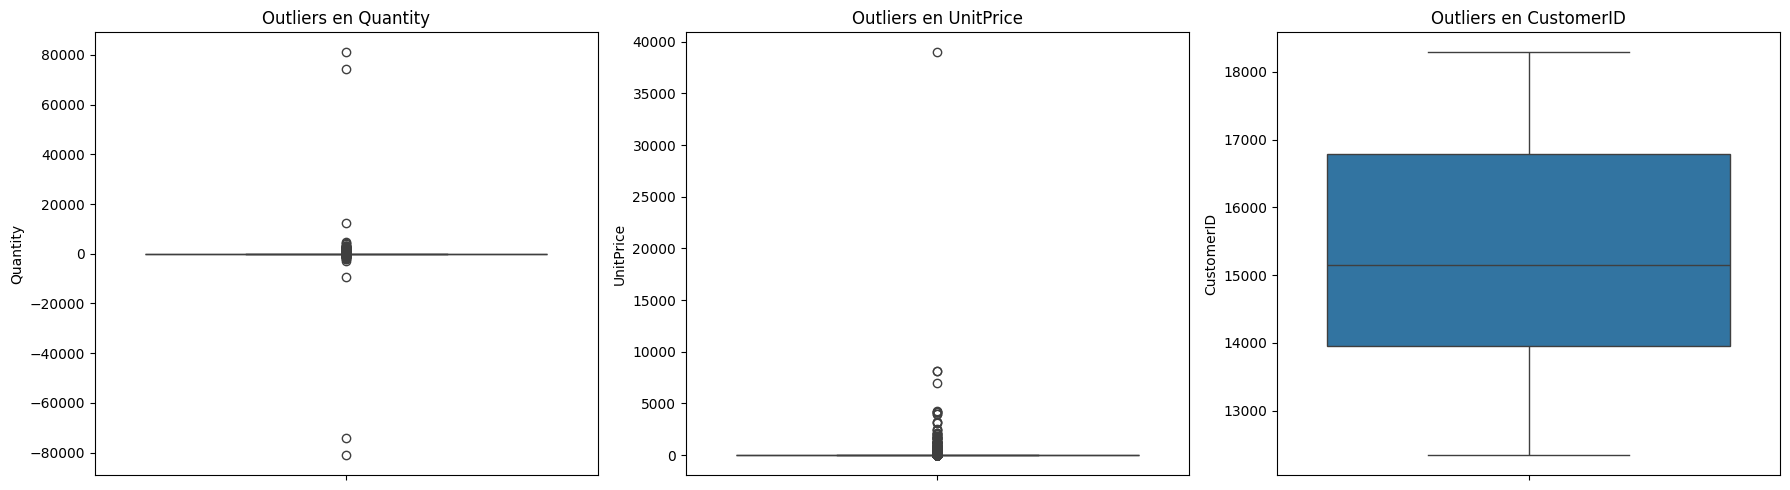

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar boxplots para ver outliers
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.boxplot(y=df['Quantity'], ax=axes[0])
axes[0].set_title('Outliers en Quantity')

sns.boxplot(y=df['UnitPrice'], ax=axes[1])
axes[1].set_title('Outliers en UnitPrice')

sns.boxplot(y=df['CustomerID'], ax=axes[2])
axes[2].set_title('Outliers en CustomerID')

plt.tight_layout()
plt.show()


📋 Tamaño inicial del dataset: (406829, 8)
✅ Tamaño después de limpieza: (397884, 8)

🧐 Valores mínimos después de limpieza:
Quantity     1.000
UnitPrice    0.001
dtype: float64

🔎 Valores nulos restantes:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


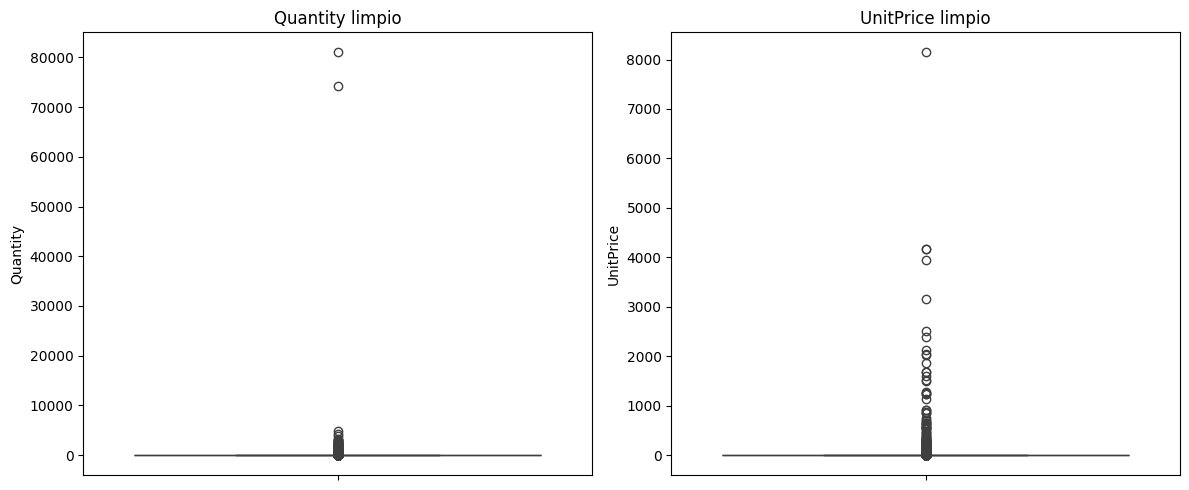

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#  Mostrar tamaño inicial
print(f"📋 Tamaño inicial del dataset: {df.shape}")

#  Eliminar filas con Quantity <= 0 (devoluciones o errores)
df = df[df['Quantity'] > 0]

# Eliminar filas con UnitPrice <= 0 (errores)
df = df[df['UnitPrice'] > 0]


#  Mostrar tamaño final
print(f"✅ Tamaño después de limpieza: {df.shape}")

#  Verificar si aún quedan valores negativos o nulos
print("\n🧐 Valores mínimos después de limpieza:")
print(df[['Quantity', 'UnitPrice']].min())

print("\n🔎 Valores nulos restantes:")
print(df.isnull().sum())

# Mostrar boxplots para confirmar limpieza
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(y=df['Quantity'], ax=axes[0])
axes[0].set_title('Quantity limpio')

sns.boxplot(y=df['UnitPrice'], ax=axes[1])
axes[1].set_title('UnitPrice limpio')

plt.tight_layout()
plt.show()


In [46]:
# Definir columnas a eliminar
columnas_a_eliminar = ['InvoiceNo', 'StockCode', 'Description', 'Country']

# Eliminar del DataFrame
df = df.drop(columns=columnas_a_eliminar)

# Verificar columnas restantes
print("📋 Columnas restantes en el DataFrame:")
print(df.columns)


📋 Columnas restantes en el DataFrame:
Index(['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID'], dtype='object')


C:\Users\david\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


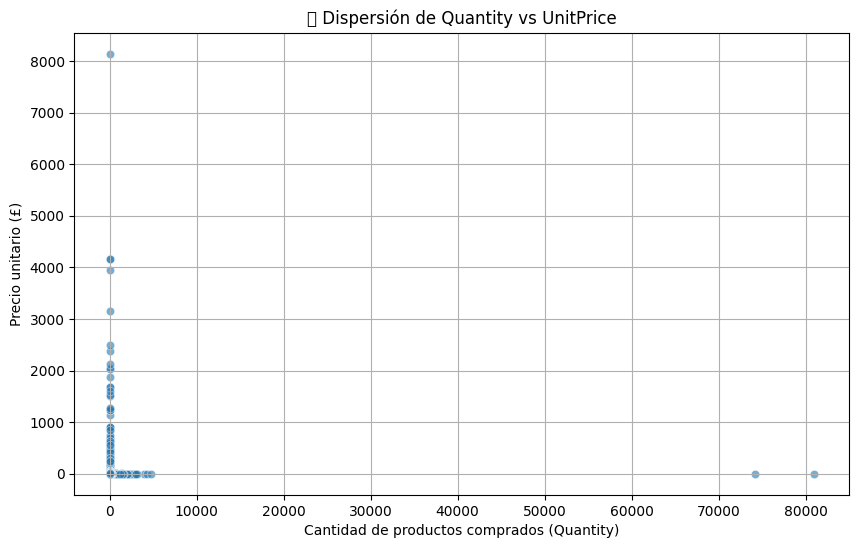

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df, alpha=0.6)
plt.title('🔎 Dispersión de Quantity vs UnitPrice')
plt.xlabel('Cantidad de productos comprados (Quantity)')
plt.ylabel('Precio unitario (£)')
plt.grid(True)
plt.show()


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Quantity     397884 non-null  int64  
 1   InvoiceDate  397884 non-null  object 
 2   UnitPrice    397884 non-null  float64
 3   CustomerID   397884 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.2+ MB


In [49]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [50]:
df.head(1)

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,01-12-2010 08:26,2.55,17850.0


In [52]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')


In [55]:
# Crear columna Monetary temporal
df['Monetary'] = df['Quantity'] * df['UnitPrice']

# Definir fecha de referencia
fecha_ref = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calcular RFM agrupado por CustomerID
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (fecha_ref - x.max()).days,   # Recency
    'Quantity': 'count',                                   # Frequency (número de compras)
    'Monetary': 'sum'                                      # Monetary (total gastado)
})

# Renombrar columnas
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'Quantity': 'Frequency',
    'Monetary': 'Monetary'
}, inplace=True)

# Mostrar primeras filas
print(rfm.head())


            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          19         73   1757.55
12350.0         310         17    334.40


In [56]:
from sklearn.preprocessing import StandardScaler

# Crear copia para no dañar el original
rfm_scaled = rfm.copy()

# Inicializar el scaler
scaler = StandardScaler()

# Aplicar StandardScaler a las columnas RFM
rfm_scaled[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm_scaled[['Recency', 'Frequency', 'Monetary']])

# Verificar resultado
print(rfm_scaled.head())


             Recency  Frequency  Monetary
CustomerID                               
12346.0     2.334574  -0.396578  8.358668
12347.0    -0.905340   0.394649  0.250966
12348.0    -0.175360  -0.265435 -0.028596
12349.0    -0.735345  -0.081836 -0.033012
12350.0     2.174578  -0.326635 -0.191347


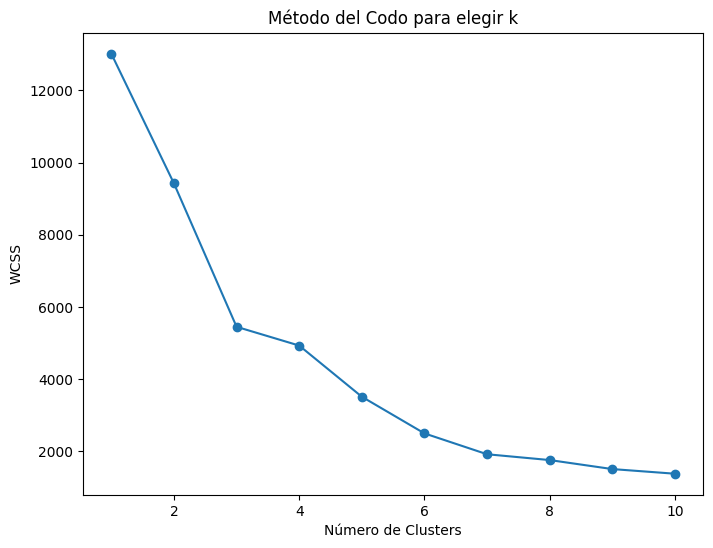

In [57]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []  # within-cluster sum of squares

# Probar de 1 a 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el codo
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo para elegir k')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


In [58]:
from sklearn.cluster import KMeans

# Aplicar KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_scaled['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Agregar al dataframe original 
rfm['Cluster'] = rfm_scaled['Cluster']

# Contar clientes por cluster
print("Cantidad de clientes por cluster:")
print(rfm['Cluster'].value_counts())

# Ver el perfil promedio de cada grupo
perfil_clusters = rfm.groupby('Cluster').mean().round(2)
print("\nPerfil promedio de cada cluster:")
print(perfil_clusters)


Cantidad de clientes por cluster:
Cluster
0    2171
1    1326
3     828
2      13
Name: count, dtype: int64

Perfil promedio de cada cluster:
         Recency  Frequency   Monetary
Cluster                               
0          20.99     135.29    2645.82
1          98.22      37.72     773.88
2           4.69    2565.31  126118.31
3         272.41      25.14     605.84


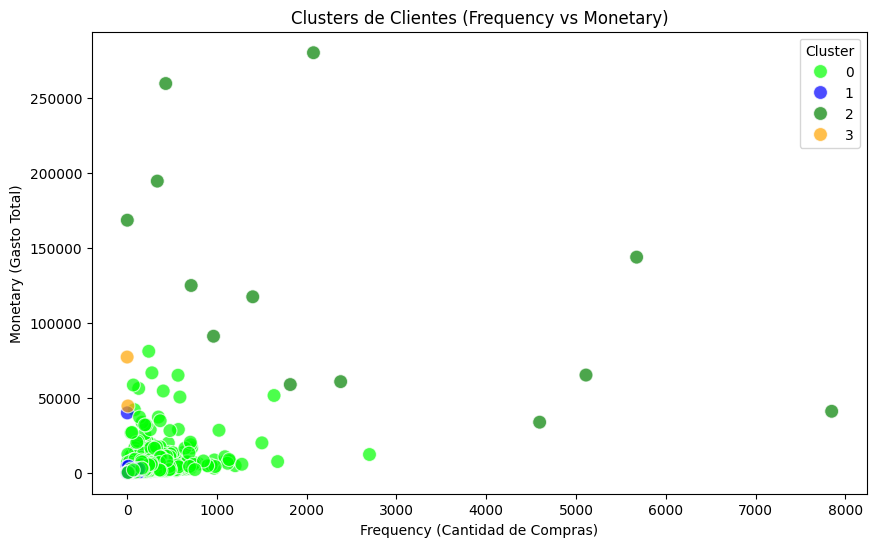

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asignar colores a los clusters
colores = {2: 'green', 0: 'lime', 1: 'blue', 3: 'orange'}  # puedes cambiar si quieres
rfm['Color'] = rfm['Cluster'].map(colores)

# Crear scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rfm,
    x='Frequency',
    y='Monetary',
    hue='Cluster',
    palette=colores,
    alpha=0.7,
    s=100
)

plt.title('Clusters de Clientes (Frequency vs Monetary)')
plt.xlabel('Frequency (Cantidad de Compras)')
plt.ylabel('Monetary (Gasto Total)')
plt.legend(title='Cluster')
plt.show()


In [60]:
from sklearn.metrics import silhouette_score

# Calcula Silhouette Score
score = silhouette_score(rfm_scaled, rfm['Cluster'])
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.583


In [61]:
from sklearn.metrics import calinski_harabasz_score

# Calcula Calinski-Harabasz Index
ch_score = calinski_harabasz_score(rfm_scaled, rfm['Cluster'])
print(f"Calinski-Harabasz Index: {ch_score:.2f}")


Calinski-Harabasz Index: 3959.81
